In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv('ai4i2020.csv')

In [201]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [202]:
null = df.isnull().sum()
dublicate = df.duplicated().sum()
null,dublicate

(UDI                        0
 Product ID                 0
 Type                       0
 Air temperature [K]        0
 Process temperature [K]    0
 Rotational speed [rpm]     0
 Torque [Nm]                0
 Tool wear [min]            0
 Machine failure            0
 TWF                        0
 HDF                        0
 PWF                        0
 OSF                        0
 RNF                        0
 dtype: int64,
 np.int64(0))

In [203]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


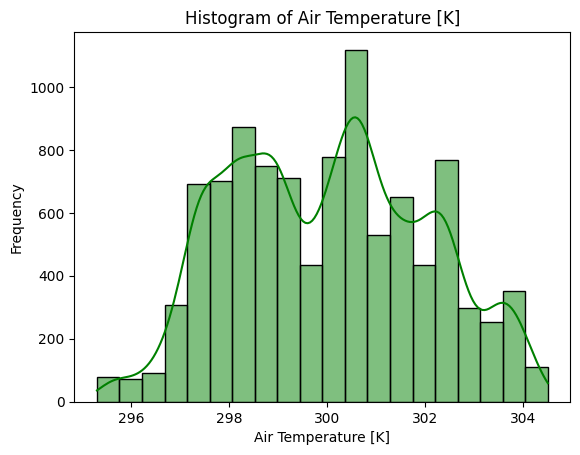

In [ ]:
sns.histplot(df['Air temperature [K]'], kde=True, bins=20, color='green')
plt.title('Histogram of Air Temperature [K]')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Frequency')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24604\3518699304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Torque [Nm]', data=df, palette='coolwarm')


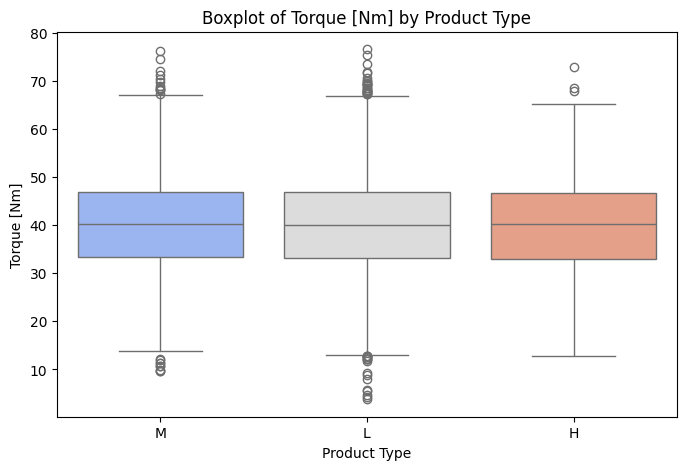

In [210]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Torque [Nm]', data=df, palette='coolwarm')
plt.title('Boxplot of Torque [Nm] by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Torque [Nm]')
plt.show()

In [164]:
ikki = df[['Rotational speed [rpm]', 'Torque [Nm]']]

In [165]:
from sklearn.preprocessing import OneHotEncoder
oneh = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')


In [166]:
df_one_hot = oneh.fit_transform(df[['Type']])

In [167]:
df_one_hot.astype(np.int8)

,Type_H,Type_L,Type_M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,1,0,0
9997,0,0,1
9998,1,0,0


In [168]:
df = pd.concat([df,df_one_hot],axis=1).drop(columns=['Type'])

In [169]:
df

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0.0,0.0,1.0
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0.0,1.0,0.0
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0.0,1.0,0.0
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0.0,1.0,0.0
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0.0,0.0,1.0
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1.0,0.0,0.0
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0.0,0.0,1.0
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1.0,0.0,0.0


In [170]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190,0.100300,0.600000,0.299700
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355,0.300415,0.489922,0.458149
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [171]:
df = df.drop(['Air temperature [K]','UDI','Product ID','TWF','RNF'], axis=1)


In [172]:
df.dtypes

Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
HDF                          int64
PWF                          int64
OSF                          int64
Type_H                     float64
Type_L                     float64
Type_M                     float64
dtype: object

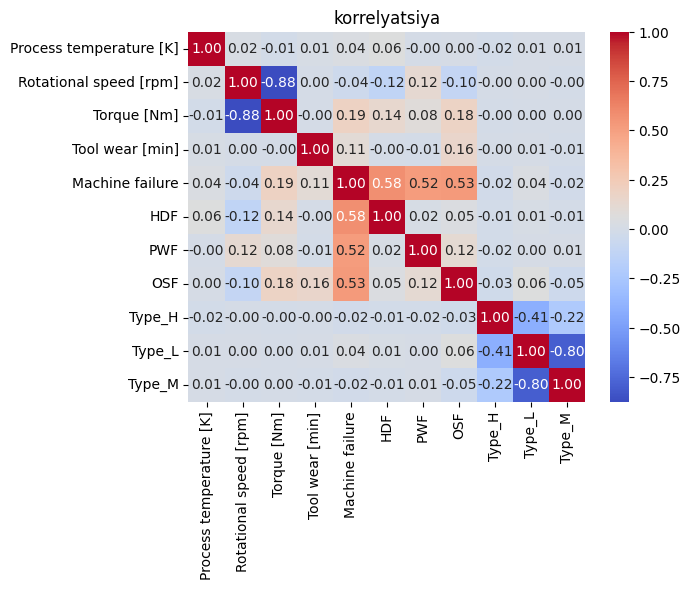

In [173]:
cor = df.corr()

sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('korrelyatsiya')
plt.show()

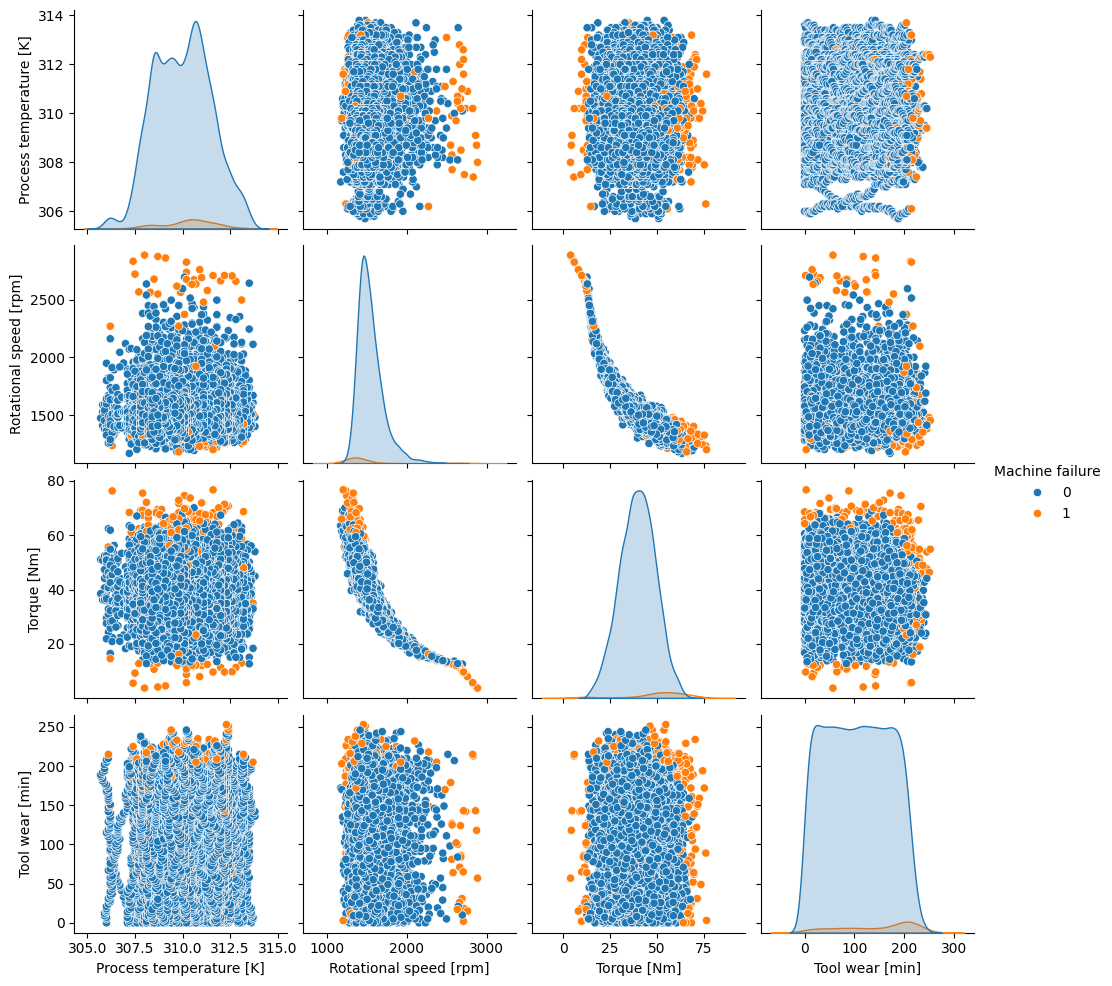

In [174]:
sns.pairplot(df[[ 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']], hue='Machine failure')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_24604\766562626.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Machine failure', data=df, palette='pastel')


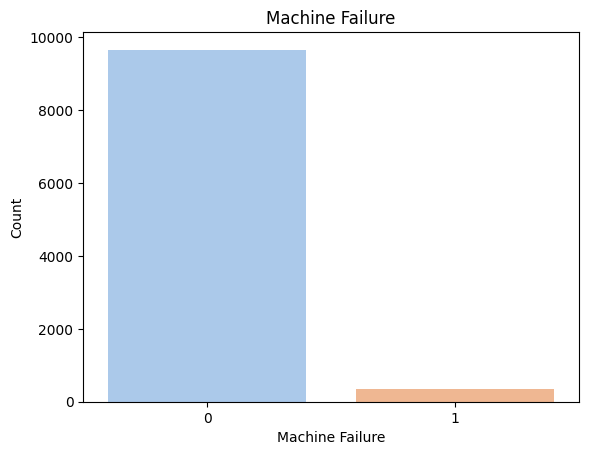

In [175]:
sns.countplot(x='Machine failure', data=df, palette='pastel')
plt.title('Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Process temperature [K]  10000 non-null  float64
 1   Rotational speed [rpm]   10000 non-null  int64  
 2   Torque [Nm]              10000 non-null  float64
 3   Tool wear [min]          10000 non-null  int64  
 4   Machine failure          10000 non-null  int64  
 5   HDF                      10000 non-null  int64  
 6   PWF                      10000 non-null  int64  
 7   OSF                      10000 non-null  int64  
 8   Type_H                   10000 non-null  float64
 9   Type_L                   10000 non-null  float64
 10  Type_M                   10000 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 859.5 KB


In [177]:
X = df[['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','HDF','PWF','OSF','Type_H','Type_L','Type_M']]
y = df['Machine failure']

In [178]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X, y)

In [179]:
y_balanced

6130    0
9063    0
2751    0
5744    0
3779    0
       ..
9758    1
9764    1
9822    1
9830    1
9974    1
Name: Machine failure, Length: 678, dtype: int64

In [180]:
X_balanced

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],HDF,PWF,OSF,Type_H,Type_L,Type_M
6130,310.9,1473,44.2,116,0,0,0,0.0,1.0,0.0
9063,308.3,1419,39.7,115,0,0,0,0.0,1.0,0.0
2751,309.1,1417,50.1,187,0,0,0,0.0,1.0,0.0
5744,311.5,1482,42.6,16,0,0,0,1.0,0.0,0.0
3779,311.0,1657,31.1,3,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9758,309.8,2271,16.2,218,0,0,0,0.0,1.0,0.0
9764,309.5,1294,66.7,12,0,1,0,0.0,1.0,0.0
9822,309.4,1360,60.9,187,0,0,1,0.0,1.0,0.0
9830,309.3,1337,56.1,206,0,0,1,0.0,1.0,0.0


In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        76
           1       0.88      0.88      0.88        60

    accuracy                           0.90       136
   macro avg       0.90      0.90      0.90       136
weighted avg       0.90      0.90      0.90       136



c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.95      0.94        76
           1       0.93      0.90      0.92        60

    accuracy                           0.93       136
   macro avg       0.93      0.92      0.93       136
weighted avg       0.93      0.93      0.93       136



In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=300, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, 
                                   scoring='accuracy', n_iter=50, cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 188, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 80}
Best Score: 0.9409785932721713


In [185]:
best_model = random_search.best_estimator_


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        76
           1       0.93      0.90      0.92        60

    accuracy                           0.93       136
   macro avg       0.93      0.92      0.93       136
weighted avg       0.93      0.93      0.93       136



In [ ]:
rf_optimized = grid_search.best_estimator_

y_pred_optimized = rf_optimized.predict(X_test)

print(classification_report(y_test, y_pred_optimized))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        76
           1       0.96      0.90      0.93        60

    accuracy                           0.94       136
   macro avg       0.94      0.94      0.94       136
weighted avg       0.94      0.94      0.94       136



In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

y_pred_default = rf_default.predict(X_test)

print(classification_report(y_test, y_pred_default))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        76
           1       0.96      0.88      0.92        60

    accuracy                           0.93       136
   macro avg       0.94      0.93      0.93       136
weighted avg       0.94      0.93      0.93       136



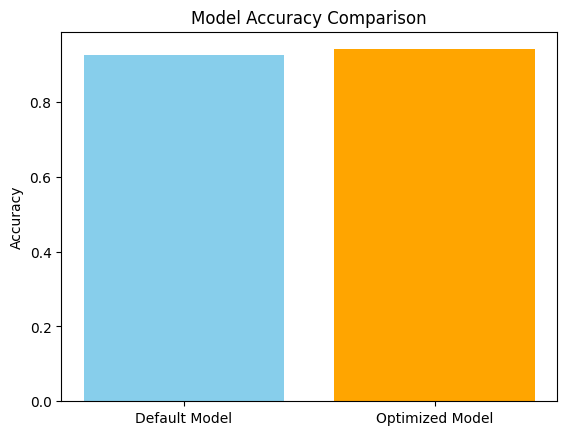

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
accuracy_scores = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_optimized)]
labels = ['Default Model', 'Optimized Model']
plt.bar(labels, accuracy_scores, color=['skyblue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
